In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('Reviews.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df = df.head(10000)

In [5]:
import string
import re

stopwordSet = set(stopwords.words("english"))

def cleanText(line):
    global stopwordSet
    
    line = line.translate(string.punctuation)
    line = line.lower().split()
    
    line = [word for word in line if not word in stopwordSet and len(word) >= 3]
    line = " ".join(line)
    
    return re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", line) 

In [6]:
data = df[['ProductId', 'UserId', 'Score', 'Text']]

In [7]:
%%time
data['Text'] = data['Text'].apply(cleanText)

CPU times: user 438 ms, sys: 4.5 ms, total: 442 ms
Wall time: 443 ms


/home/howard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data['textlen'] = data['Text'].apply(len)

/home/howard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


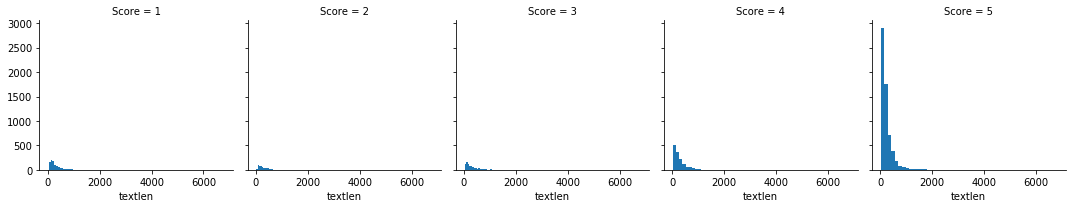

<Figure size 2880x1728 with 0 Axes>

In [10]:
g = sns.FacetGrid(data=data, col='Score')
plt.figure(figsize=(40, 24))
g.map(plt.hist, 'textlen', bins=50)

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(data['Text'], df['ProductId'], test_size = 0.2) 

In [12]:
user_df = data[['UserId','Text']]
product_df = data[['ProductId', 'Text']]

In [13]:
user_df = user_df.groupby('UserId').agg({'Text': ' '.join})
product_df = product_df.groupby('ProductId').agg({'Text': ' '.join})

In [14]:
user_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=1000)
user_vectors = user_vectorizer.fit_transform(user_df['Text'])
user_vectors.shape

(9015, 1000)

In [15]:
product_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=1000)
product_vectors = product_vectorizer.fit_transform(product_df['Text'])
product_vectors.shape

(1422, 1000)

In [16]:
userRatings = pd.pivot_table(data, values='Score', index=['UserId'], columns=['ProductId'])
userRatings.shape

(9015, 1422)

In [17]:
userRatings.head()

ProductId,B00002NCJC,B00002Z754,B00005V3DC,B000084DVR,B000084E1U,B000084EK4,B000084EK5,B000084EK6,B000084EK7,B000084EK8,...,B0092XAMDQ,B0093NIWVO,B00959DMWK,B00961CUXO,B0096E5196,B009AVDFCK,B009D668KS,B009HINRX8,B009UOFU20,B009WSNWC4
UserId,,,,,,,,,,,,,,,,,,,,,
A10012K7DF3SBQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1001TYW5FZYD9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1008DPSP6KC9J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A101C99CG8EFUH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A102XKYZE9Q9L4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
P = pd.DataFrame(user_vectors.toarray(), index=user_df.index, columns=user_vectorizer.get_feature_names())
Q = pd.DataFrame(product_vectors.toarray(), index=product_df.index, columns=product_vectorizer.get_feature_names())

In [19]:
Q.head()

,!,!!,!!!,!<,',",",-,--,.,..,...,would,wow,wrong,www,year,years,yes,yet,you,yummy
ProductId,,,,,,,,,,,,,,,,,,,,,
B00002NCJC,0.074786,0.0,0.000000,0.0,0.069954,0.109816,0.348844,0.0,0.291801,0.0,...,0.0,0.0,0.0,0.167349,0.0,0.000000,0.0,0.0,0.0,0.0
B00002Z754,0.079943,0.0,0.000000,0.0,0.149554,0.058694,0.000000,0.0,0.363909,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
B00005V3DC,0.000000,0.0,0.000000,0.0,0.175857,0.092022,0.000000,0.0,0.366781,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.106897,0.0,0.0,0.0,0.0
B000084DVR,0.122790,0.0,0.129462,0.0,0.057428,0.180306,0.000000,0.0,0.319405,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
B000084E1U,0.110879,0.0,0.000000,0.0,0.103714,0.081407,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [20]:
def matrix_factorization(R, P, Q, steps=1, gamma=0.001,lamda=0.02):
    for step in range(steps):
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    eij=R.loc[i,j]-np.dot(P.loc[i],Q.loc[j])
                    P.loc[i]=P.loc[i]+gamma*(eij*Q.loc[j]-lamda*P.loc[i])
                    Q.loc[j]=Q.loc[j]+gamma*(eij*P.loc[i]-lamda*Q.loc[j])
        e=0
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    e= e + pow(R.loc[i,j]-np.dot(P.loc[i],Q.loc[j]),2)+lamda*(pow(np.linalg.norm(P.loc[i]),2)+pow(np.linalg.norm(Q.loc[j]),2))
        if e<0.001:
            break
        
    return P,Q


In [ ]:
%%time
P, Q = matrix_factorization(userRatings, P, Q, steps=1, gamma=0.001,lamda=0.02)

In [23]:
import pickle
output = open('api/model.pkl', 'wb')
pickle.dump(P,output)
pickle.dump(Q,output)
pickle.dump(user_vectorizer,output)
output.close()